<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: black; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">Exploratory Data Analysis(EDA)</span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> and Machine Learning  </span> 
</p>

 # **Google Playstore Data**


# About Data

The Data Set was downloaded from Kaggle, from the following: https://www.kaggle.com/lava18/google-play-store-apps.
Due to some inconsistencies and misaligned rows, the data was manually rearranged and cleaned using Excel to make it suitable for analysis.
- 'Context'
  
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- 'Content'
  
Each app (row) has values for catergory, rating, size, and more.

- 'Acknowledgements'
  
This information is scraped from the Google Play Store. This app information would not be available without it.

- 'Inspiration'
  
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. **Data Loading, exploration and cleaning**

Load the csv file with pandas

Creating the dataframe and understanding the data present in the dataset using pandas

Dealing with the missing values , outliers and cleaning the data

**Load Data**

In [8]:
df = pd.read_csv('updated_googleplaystore.csv')


**View first 5 rows**

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Drop the entity where all the values are missing(if exists)**

In [10]:

df = df.dropna(how='all')


**Hide warnings at runtime**

In [11]:
import warnings
warnings.filterwarnings('ignore')

**Columns in the dataframe**

In [12]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**shape of the dataframe**

In [13]:
df.shape

(10841, 13)

**information about the column types and non-null values**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observation**

- The dataset has 10841 rows and 13 columns
- The dataset contain null values
- Object datatype columns are :
    - 'App', 'Category', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'
- Numeric datatype columns are :
    - 'Rating', 'Reviews'
- Few column in the dataframe are should be numeric data type but it's not the case because of the commas and plus sign in the column 'Installs' , 'Size' and 'Price'.

### Overview of Numeric datatype columns :

In [15]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


- Only two columns are numeric columns 'Rating' and 'Reviews'

**Converting the object datatype columns that have numeric values to numeric datatype that are 'Size', 'Installs' and 'Price'**

**Lets update the "Size" column first**

In [16]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

**Null value count**

In [17]:
df['Size'].isnull().sum()

np.int64(0)

No null values exist in size column

**Unique values in the size column**

In [18]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- It has several uniques values in the size column, we have to first make the unit into one common unit from M and K to bytes, and then remove the M and K from the values and convert them into numeric data type.

**Values in size having 'M' in it**

In [19]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

**Values in size having 'K' in it**

In [20]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

**Values in size having 'Varies with device' in it**

In [21]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

## Observation

- There are 8830 values in the size column having 'M' in it
- There are 316 values in the size column having 'K' in it
- There are 1695 values in the size column having 'Varies with device' in it

In [22]:
# Covert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric

def convert_size(size):
    # add function details here
    '''This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it'''
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size
df['Size'] = df['Size'].apply(convert_size)

            

**Rename the column name 'Size' to 'Size_in_bytes'**

In [23]:
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

**Create new column called 'Size_in_Mb' which will have the size in MB**

In [24]:
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/1024/1024)

- we have remove the 'M' and 'K' from the values in the size column
- we have converted the size column to numeric


**Check the datatype of columns size in bytes and size in MB**

In [25]:
print(df['Size_in_Mb'].dtypes)
print(df['Size_in_bytes'].dtypes)

float64
float64


*Both are of numeric datatype*

---

***Lets move toward the "Installs" column***

*View unique values*

In [26]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

*count of unique values*

In [27]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

*Number of values with + sign in installs*

In [28]:
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

*Total number of values in Installs column*

In [29]:
df['Installs'].value_counts().sum() 

np.int64(10841)

- Only problem is that there are several values in the Installs column which has '+' in it
- There are 10840 values in the Installs column which has '+' in it
- Only one value in the Installs column which has not '+' in it
---

- Lets remove the '+' sign from the Installs column

In [30]:
# Remove + sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', ''))
# Remove , sign from install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', ''))

df['Installs'] = pd.to_numeric(df['Installs'])
df['Installs'].dtypes

dtype('int64')

*We can categorize the Installs column into categories*

*Making new column by the name of 'Installs Categories'*

Maximum installs of an app in the dataset

In [31]:
df['Installs'].max()

1000000000

**Categorize the apps over number of installs**

In [32]:
bins = [-1,0,10,1000,10000,100000,1000000,10000000,1000000000]
labels = ['no','very_low','low','moderate','more than moderate','high','very high','Top Notch']
df['Installs Category'] = pd.cut(df['Installs'], bins = bins, labels=labels)

Number of apps in each category

In [33]:
print(df['Installs Category'].value_counts().sort_index())
print(df['Installs Category'].value_counts().sum())

Installs Category
no                      15
very_low               535
low                   2162
moderate              1531
more than moderate    1648
high                  2118
very high             2004
Top Notch              828
Name: count, dtype: int64
10841


Datatype of installs category and installs

In [34]:
print(df['Installs Category'].dtypes)
print(df['Installs'].dtypes)

category
int64


*Now the datatype of Installs column is int64 and divided into categories as well*

---

***Lets move toward the "Price" column***

Unique values

In [35]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

unique values count

In [36]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, Length: 92, dtype: int64

*Check does any other currency other than USD is there*

In [37]:
# Counts the values with $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [38]:
# Counts the values without $ sign
df['Price'].loc[~df['Price'].str.contains('\$',regex= True)].value_counts().sum()

np.int64(10041)

- We have 10041 values without $ sign and that are zero
- 800 values with $ sign
- 10041+800 = 10841 which is the total number of values in the Price column also

*Only issue in the price column is that it has $ sign in it*

*Lets remove it*

In [39]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', ''))
df['Price'] = pd.to_numeric(df['Price'])

Datatype of price column

In [40]:
df['Price'].dtypes

dtype('float64')

*Now the datatype of Price column is numeric*

In [41]:
# Check the min,max and mean of price column    
print(f"Minimum value of price is {df['Price'].min()}")
print(f"Maximum value of price is {df['Price'].max()}")
print(f"Mean value of price is {df['Price'].mean()}")

Minimum value of price is 0.0
Maximum value of price is 400.0
Mean value of price is 1.0272733142699015


## **All possible non_numeric columns that should be numeric are converted to numeric**

*Moving towards the further analysis*

---

# **Discriptive Statistics**

*List of numeric columns with statistics*

In [42]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


- Now, we have 6 columns as numeric data type.
- We can check the discriptive statistics of each column separately.Like minimum rating is 1 and maximum rating is 5 with average of 4.19 which is a good rating. On an average people give this rating.
- Similarly in Reviews column, Minimum reviews are 0 and maximum reviews are 78,158,306 which is 78+ Millions and mean is 444,111.93 which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.   

---

The most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.

**Lets deal with the missing values in the dataset**

Number of missing values in each column

In [43]:
df.isna().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs Category       0
dtype: int64

Total missing values in dataset

In [44]:
df.isna().sum().sum()

np.int64(4877)

There are total 4877 entities are missing in our dataset

In [45]:
# Sort them all first
df.isna().sum().sort_values(ascending=False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs Category       0
dtype: int64

- Dataset contain 1695 missing values in 'Size_in_bytes' and 'Size_in_Mb' column
- Dataset contain 1474 missing values in 'Rating' column
- Dataset contain 8 missing values in 'Current Ver' column
- Dataset contain 2 missing values in 'Android Ver' column
- Dataset contain 1 missing values in 'Type' , 'Category' , 'Genres' columns

ploting missing values percentage

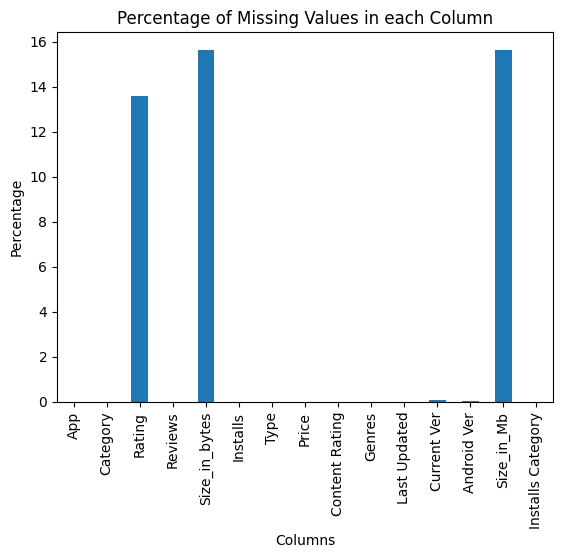

In [46]:
plt.Figure(figsize=(10, 8))
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')
plt.show()

**Heatmap of missing values**

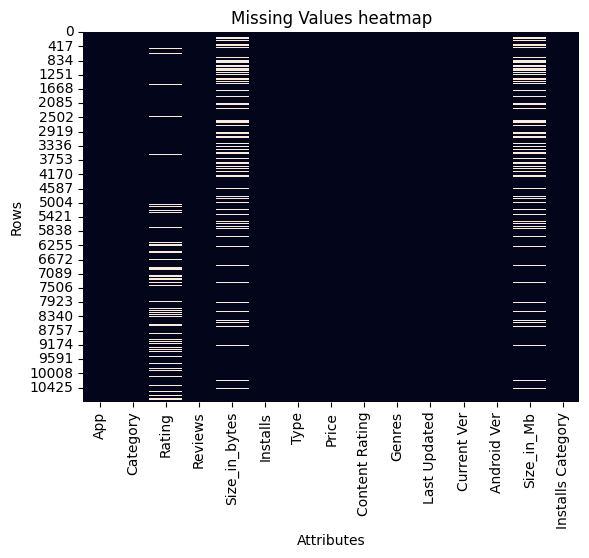

In [47]:
plt.Figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.xlabel('Attributes')
plt.ylabel('Rows')
plt.title('Missing Values heatmap')
plt.show()

***In the above graph, we can clearly see the exact position of missing values in the dataset.***

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10840 non-null  object  
 2   Rating             9367 non-null   float64 
 3   Reviews            10841 non-null  int64   
 4   Size_in_bytes      9146 non-null   float64 
 5   Installs           10841 non-null  int64   
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10841 non-null  object  
 9   Genres             10840 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10839 non-null  object  
 13  Size_in_Mb         9146 non-null   float64 
 14  Installs Category  10841 non-null  category
dtypes: category(1), float64(4), int64(2), object(8)
memor

*There exist few column with less number of missing values*

-------

 - "We can drop the columns with less number of missing values."

In [49]:
df.dropna(subset = ['Category','Type','Genres','Current Ver', 'Android Ver'], inplace=True)

In [50]:
df.isna().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs Category       0
dtype: int64

Length of dataframe after drop the null values

In [51]:
df.shape

(10829, 15)

*Before removing the null values 10841 rows and 13 columns.*

*After removing the null values we are left with 10829 rows and 13 columns.*

**Existance of missing value that cannot be drop**
- large number of missing Value

All the missing value containing column are numeric datatype

---

*We are left with missing values in Rating, Size_in Mb, Size_in_bytes*

- Lets deal with the missing values in Rating column
    - we have to be carefull while filling the missing values in rating column
        - it directly depend upon the number of installations

---

*Fill the values on the base of install category*

Trend of rating over the installs categories

In [52]:
df.groupby('Installs Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs Category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
very_low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
more than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
high,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
very high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


*Fill the missing values in Rating by using mean of each category*

In [53]:
df['Rating'] = df.groupby('Installs Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [54]:
df['Installs Category'].loc[df['Rating'].isnull()].value_counts()

Installs Category
no                    14
very_low               0
low                    0
moderate               0
more than moderate     0
high                   0
very high              0
Top Notch              0
Name: count, dtype: int64

*We are left with only those where the rating is missing/zero*
- Lets fill it with 0 to indicate that the rating is not available

In [55]:
df['Rating'].fillna(0 , inplace=True)

In [56]:
df['Installs Category'].loc[df['Rating'].isnull()].value_counts()

Installs Category
no                    0
very_low              0
low                   0
moderate              0
more than moderate    0
high                  0
very high             0
Top Notch             0
Name: count, dtype: int64

---

*Now we are only left with missing values in Size_in Mb and Size_in_bytes*
- Fill these missing values with mean value over the base of Generes column Size_in_Mb and Size_in_bytes

In [57]:
#Fill the missing values of Size_in_bytes and Size_in_Mb over the behavior of Genres
df['Size_in_bytes'] = df.groupby('Genres')['Size_in_bytes'].transform(lambda x: x.fillna(x.mean()))
df['Size_in_Mb'] = df.groupby('Genres')['Size_in_Mb'].transform(lambda x: x.fillna(x.mean()))

In [58]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size_in_bytes        3
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_in_Mb           3
Installs Category    0
dtype: int64

- we are still left with the missing values in both Size_in_bytes and Size_in_Mb columns because of their unique Generes

Extract the rows where the missing values of Size_in_Mb exist

In [59]:
missing_size_rows = df[df['Size_in_Mb'].isnull()]
missing_size_rows


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs Category
3307,MyScript Calculator,TOOLS,4.5,342336,NaN,10000000,Free,0.0,Everyone,Tools;Education,"August 10, 2015",Varies with device,Varies with device,NaN,very high
7331,"OurHome – chores, rewards, groceries and calendar",FAMILY,4.3,3146,NaN,100000,Free,0.0,Everyone,Lifestyle;Education,"January 31, 2018",3.13.2,4.1 and up,NaN,more than moderate
10218,Messenger Kids – Safer Messaging and Video Chat,FAMILY,4.2,3478,NaN,500000,Free,0.0,Everyone,Communication;Creativity,"August 6, 2018",33.0.0.22.76,4.4 and up,NaN,high


Fill the missing values of Size_in_bytes and Size_in_Mb over the behavior of Category

In [60]:
df['Size_in_bytes'] = df.groupby('Category')['Size_in_Mb'].transform(lambda x: x.fillna(x.mean()))
df['Size_in_Mb'] = df.groupby('Category')['Size_in_bytes'].transform(lambda x: x.fillna(x.mean()))

In [61]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size_in_bytes        0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_in_Mb           0
Installs Category    0
dtype: int64

**Dataset is with zero missing value**

---

# ***Analysis***



1. Descriptive Analysis
2. Diagnostic Analysis
3. predictive Analysis


---

# Discriptive Analysis

Descriptive analysis is the first step in data analysis, focusing on summarizing, organizing, and visualizing data to understand its main characteristics. 

- Deal with each attributes of the dataset

1) App Uniqueness

In [62]:
#Number of Unique Apps in dataset

Unique_apps = df['App'].nunique()
Unique_apps

9648

There is total 9648 unique apps in the dataset

2) Number of Apps in each Category

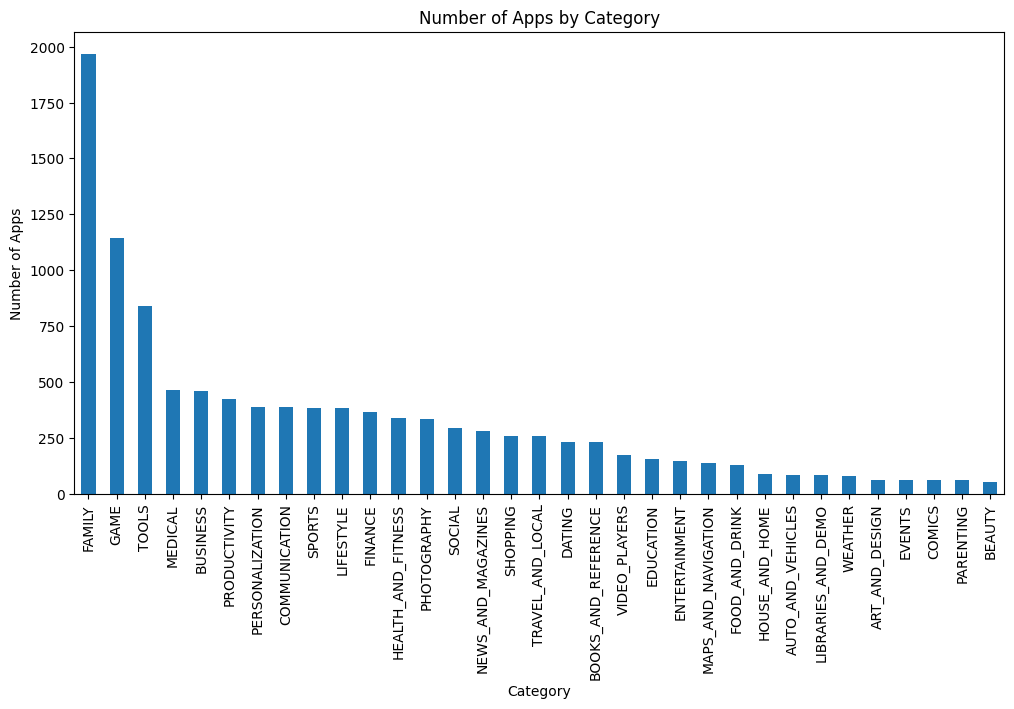

In [63]:
df['Category'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Number of Apps by Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=90)
plt.show()


App category distribution with Family being the largest category.

3) Rating Distribution

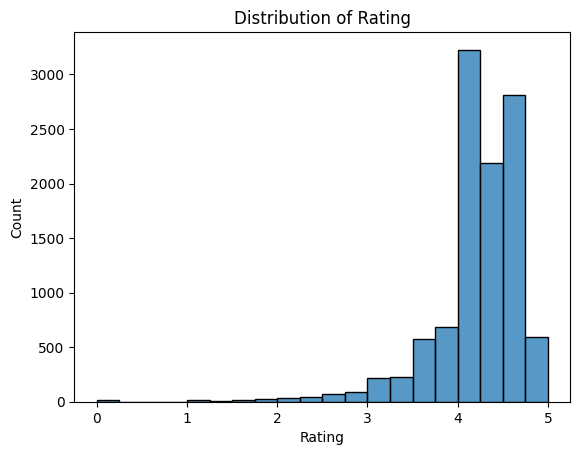

In [64]:
sns.histplot(df['Rating'] , bins = 20)
plt.title('Distribution of Rating')
plt.show()

Most of the Apps have rating in between 4.0 and 5.0

4) Reviews Distribution

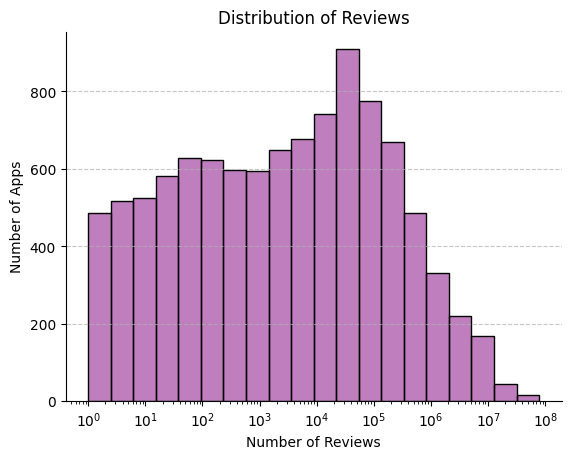

In [107]:
sns.histplot(df['Reviews'] , log_scale=True  , bins = 20, color='purple', kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Apps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

5) Distribution of apps size

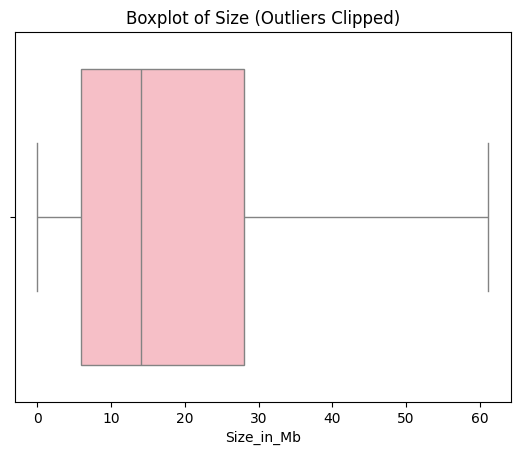

In [106]:
q1 = df['Size_in_Mb'].quantile(0.25)
q3 = df['Size_in_Mb'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

sns.boxplot(x=df['Size_in_Mb'].clip(lower=lower_bound, upper=upper_bound), color='lightpink')
plt.title('Boxplot of Size (Outliers Clipped)')
plt.show()

- Most apps fall within a compact size range under 30 MB with a few outliers extending toward 100 MB


6) Installation Count

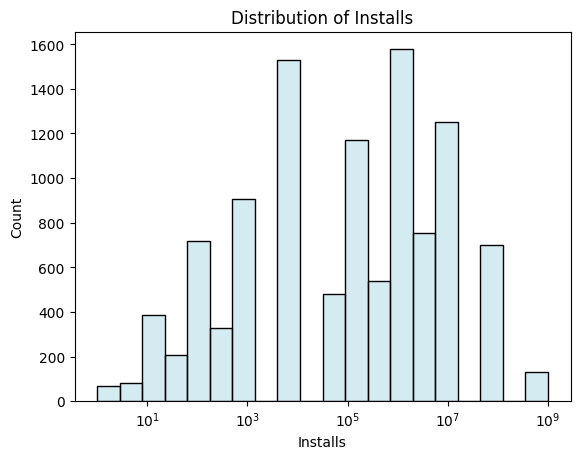

In [103]:
sns.histplot(df['Installs'], log_scale=True, bins=20, color='lightblue', kde=True)
plt.title('Distribution of Installs')
plt.show()

- Distribution is App installs using logrithmic scale


7) Price Distribution

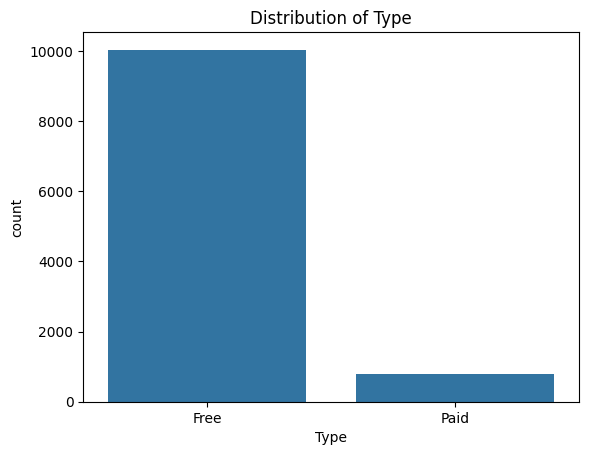

In [68]:
sns.countplot(x= 'Type' , data=df)
plt.title('Distribution of Type') 
plt.show()

- More than 90% of the apps are free

8) Distribution of Content Rating

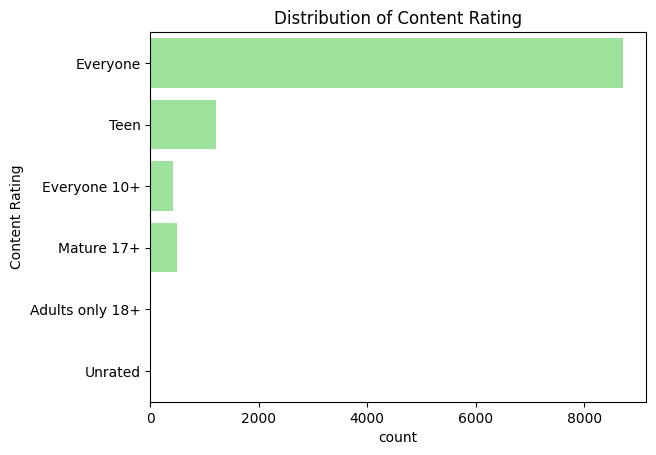

In [105]:
sns.countplot(y= 'Content Rating' , data=df, color='lightgreen')
plt.title('Distribution of Content Rating') 
plt.show()

- Most of the apps are rated for Everyone user  

9) Distribution of Genres

Text(0, 0.5, 'Number of Apps')

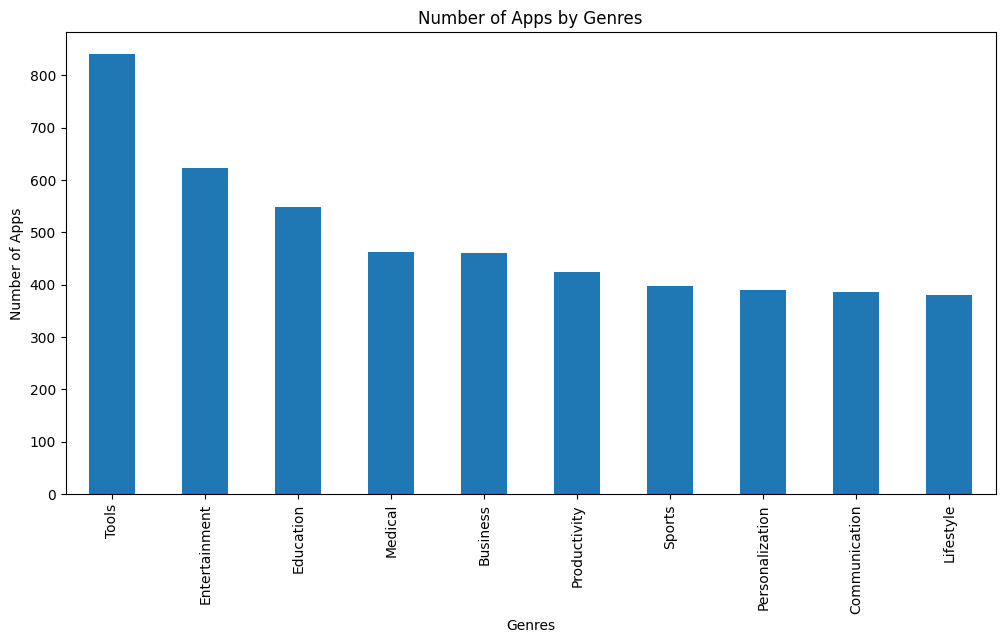

In [70]:
df['Genres'].value_counts().head(10).plot(kind='bar', figsize=(12,6))  
plt.title("Number of Apps by Genres")
plt.ylabel("Number of Apps")

- Top 10 most common app genres 

10) Analyze the most common versions of apps(Top 10)

In [71]:
print(df['Current Ver'].value_counts().head(10))
print(df['Android Ver'].value_counts().head(10))


Current Ver
Varies with device    1458
1.0                    809
1.1                    263
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
Name: count, dtype: int64
Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1373
Varies with device    1361
4.4 and up             980
2.3 and up             651
5.0 and up             601
4.2 and up             393
2.3.3 and up           281
2.2 and up             244
Name: count, dtype: int64


11) Distribution of Installs Category

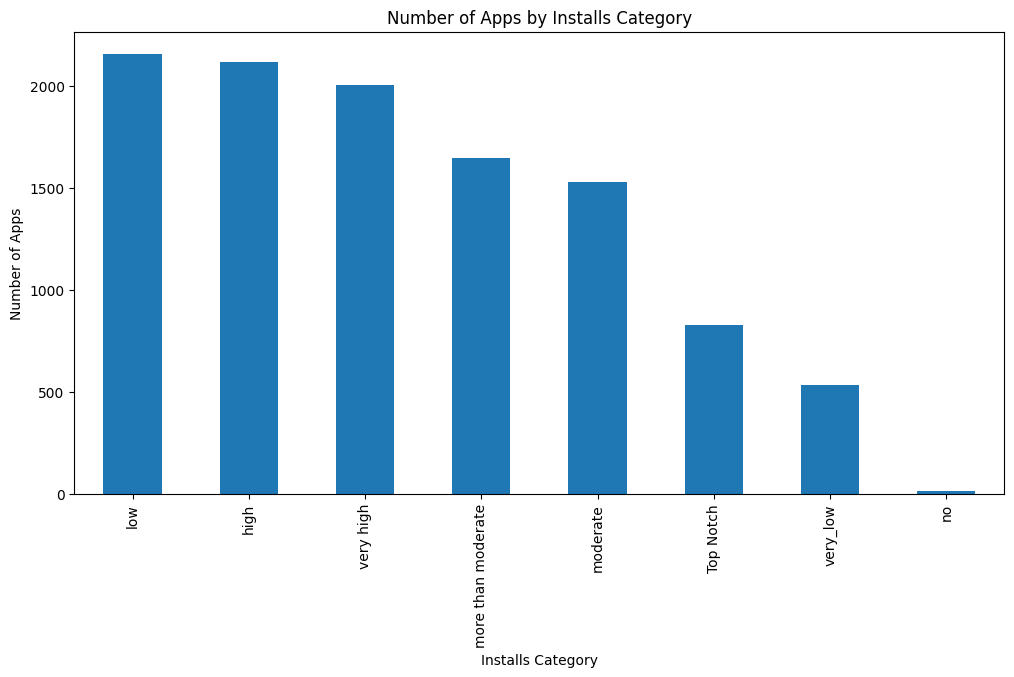

In [72]:
df['Installs Category'].value_counts().plot(kind='bar', figsize=(12,6))  
plt.title("Number of Apps by Installs Category")
plt.ylabel("Number of Apps")
plt.show()

Installs Categories are represent the distribution of number of installs of an app in the data(representation of installs of apps over the different ranges)

**Box plot of Reviews with Installs Category**

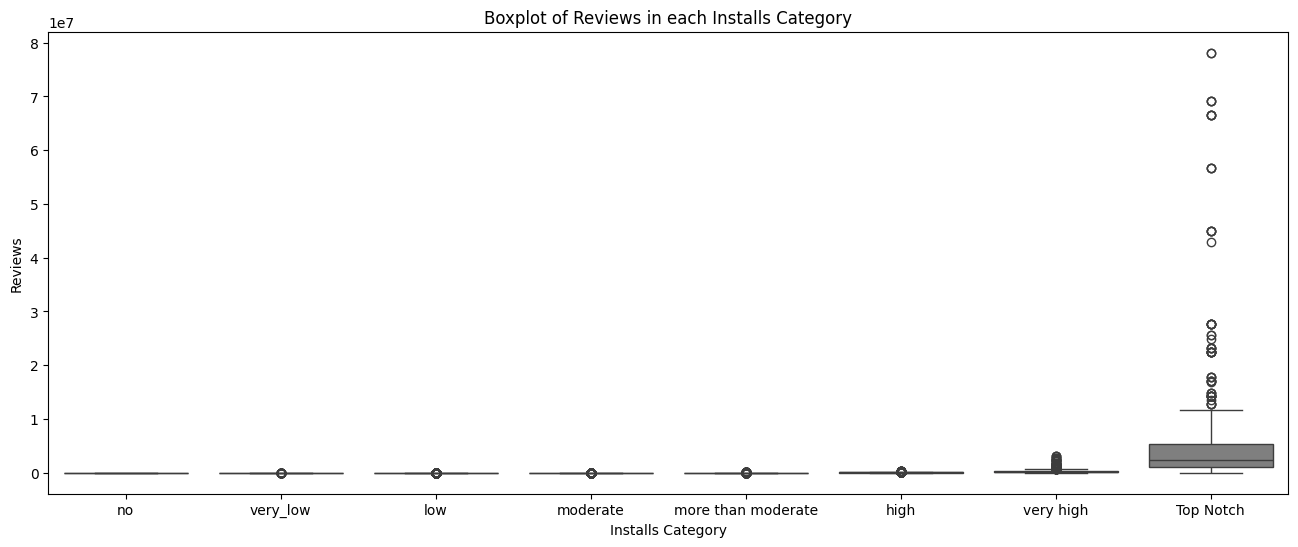

In [73]:
plt.figure(figsize=(16,6)) # make figure size
sns.boxplot(x='Installs Category', y='Reviews',hue = 'Installs Category'   , data=df) 
plt.title('Boxplot of Reviews in each Installs Category')
plt.show()


Plot show that the data is fully Imbalanced

Fix it by using log transformation

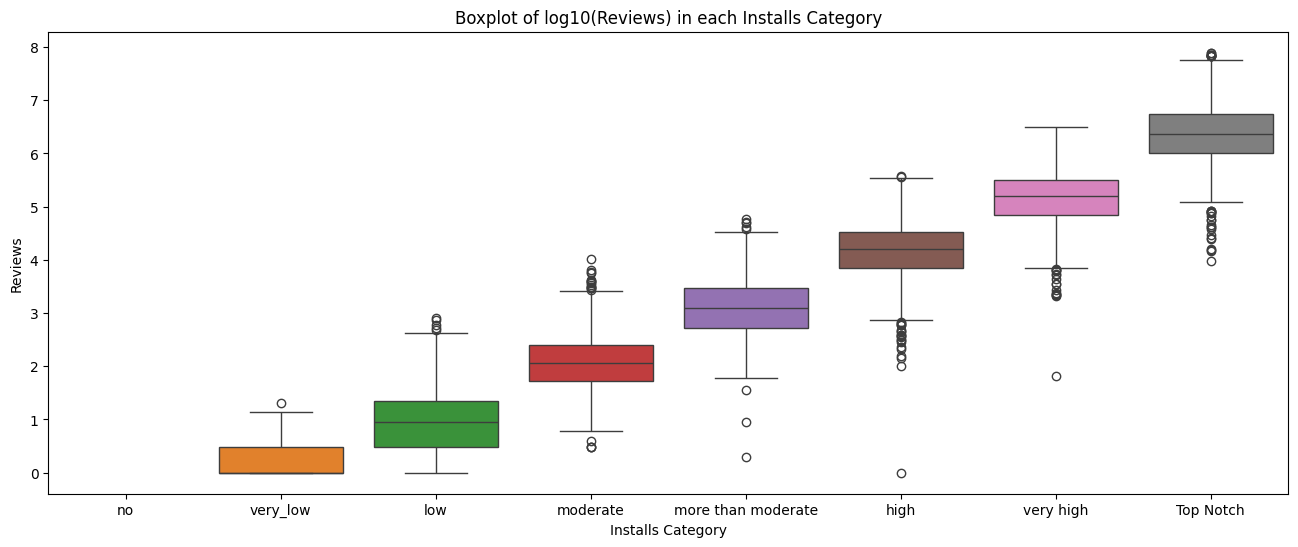

In [74]:
plt.figure(figsize=(16,6)) # make figure size
sns.boxplot(x='Installs Category', y=np.log10(df['Reviews']),hue = 'Installs Category'   , data=df)
plt.title('Boxplot of log10(Reviews) in each Installs Category')
plt.show()

Above plot show us the distribution of log10(Reviews) in each installs category where outliers are present.

- App with High installs category have more number of reviews


- Most apps have Rating clustered around 4.0 to 5.0
- App with high installs category have more number of reviews


# General insights from the data

Installs Category trends

In [75]:
df['Installs Category'].value_counts().sort_index()

Installs Category
no                      14
very_low               534
low                   2158
moderate              1528
more than moderate    1647
high                  2116
very high             2004
Top Notch              828
Name: count, dtype: int64

- The dataset categorizes apps based on the number of installs apps fall into different levels of popularity.

Which Category has the highest number of installs

In [76]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head()

Category
GAME             35086024415
COMMUNICATION    32647276251
PRODUCTIVITY     14176091369
SOCIAL           14069867902
TOOLS            11452271905
Name: Installs, dtype: int64

Category with the highest number of reviews

In [77]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head()

Category
GAME             1585422349
COMMUNICATION     815462260
SOCIAL            621241422
FAMILY            410226107
TOOLS             273181033
Name: Reviews, dtype: int64

Average Ratings of app over Category

In [78]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head()

Category
EVENTS                 4.394346
EDUCATION              4.387136
BOOKS_AND_REFERENCE    4.357312
PERSONALIZATION        4.323924
ART_AND_DESIGN         4.298885
Name: Rating, dtype: float64

Pecentage of paid apps install vs free apps installs

In [79]:
df.groupby('Type')['Installs'].sum().sort_values(ascending=False).apply(lambda x: (x/df['Installs'].sum())*100)

Type
Free    99.956509
Paid     0.043491
Name: Installs, dtype: float64

- About 99.9% of the installed apps are unpaid.

Apps with more than 1 million installs

In [80]:
df[df['Installs'] > 1000000]

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs Category
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.700000,very high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.000000,Top Notch
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20.000000,10000000,Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up,20.000000,very high
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39.000000,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,39.000000,very high
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31.000000,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,31.000000,very high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4.400000,10000000,Free,0.0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up,4.400000,very high
10781,Modern Strike Online,GAME,4.3,834117,44.000000,10000000,Free,0.0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up,44.000000,very high
10784,Big Hunter,GAME,4.3,245455,84.000000,10000000,Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up,84.000000,very high
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,17.681671,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,17.681671,very high


- 2832 apps have more than 1 million installs

Last update impacts over installs

In [81]:
df.groupby('Last Updated')['Installs'].sum().sort_values(ascending=False).head()

Last Updated
August 3, 2018    19457929945
August 1, 2018    17954769504
July 31, 2018     16570736049
August 6, 2018    16078236710
August 2, 2018    11447853993
Name: Installs, dtype: int64

- This represants that most installed apps are updated almost at the similer period of time

Paid app with maximum number of installations

In [82]:
df[df['Type'] == 'Paid'].groupby('App')['Installs'].sum().sort_values(ascending=False).head()

App
Minecraft                20000000
Hitman Sniper            10000000
Facetune - For Free       3000000
HD Widgets                2000000
Beautiful Widgets Pro     2000000
Name: Installs, dtype: int64

Number of installs across different price ranges

In [83]:
df.groupby('Price')['Installs'].sum().sort_values(ascending=False)

Price
0.00      167558951306
6.99          21143100
0.99          20348363
2.99          10411022
5.99           4779912
              ...     
28.99                1
30.99                0
200.00               0
154.99               0
394.99               0
Name: Installs, Length: 92, dtype: int64

# Diagnostics Analysis

In this type of analysis we have to find out "Why something happen" by analyzing the data.

**Correlation Between Numeric Features**

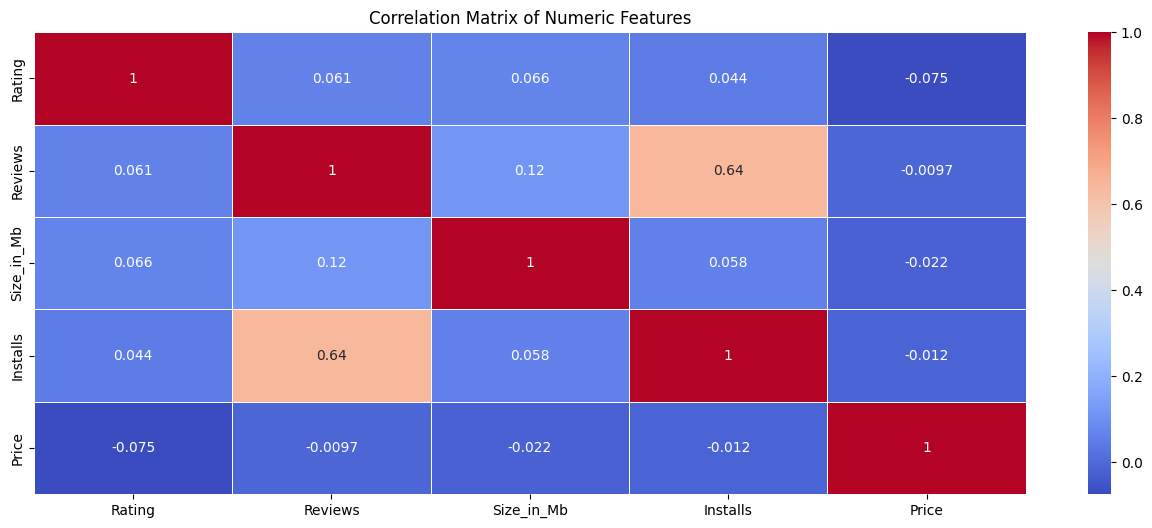

In [84]:
plt.figure(figsize=(16,6)) 
numeric_cols = ['Rating', 'Reviews', 'Size_in_Mb', 'Installs', 'Price']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

Number of installs and Reviews are highly correlated

- As of Size_in_bytes directly correlate with Size_in_Mb, Columns that impact Size_in_Mb are also impact Size_in_bytes

**Change in "Rating" w.r.t "Category"**

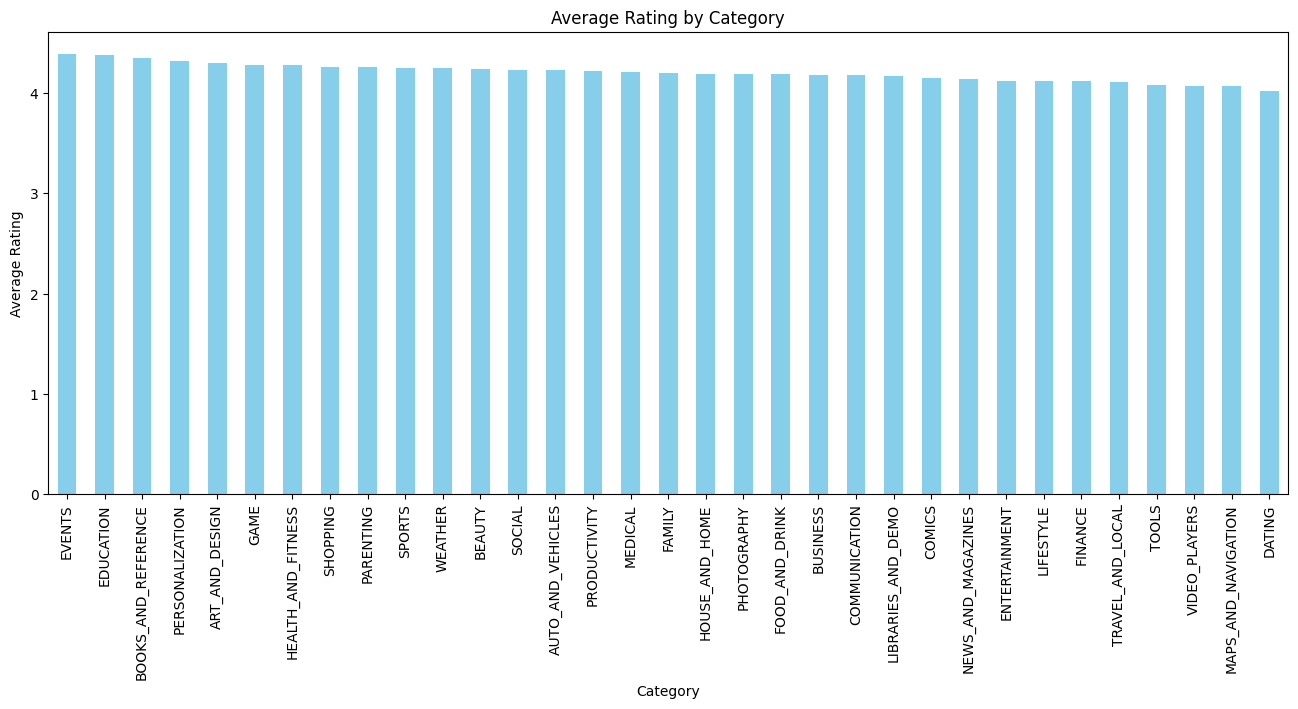

In [108]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).plot(kind='bar' , figsize=(16,6), color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')
plt.show()

Average ratings of each Category are more than 4.0 that means overall rating is good.

**Impact of "Size_in_Mb" on "Rating"**

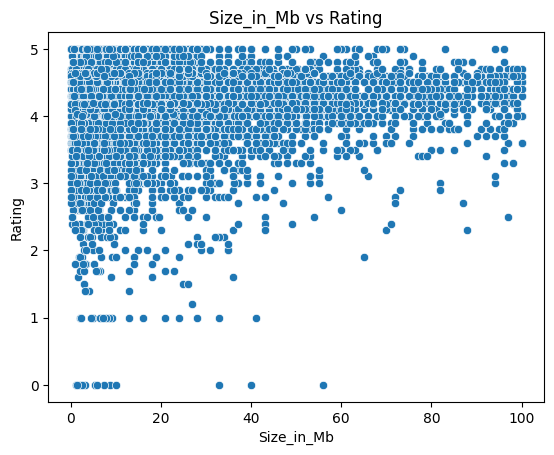

In [86]:
sns.scatterplot(x='Size_in_Mb', y='Rating', data=df)
plt.xlabel('Size_in_Mb')
plt.ylabel('Rating')
plt.title('Size_in_Mb vs Rating')
plt.show()

Few Apps with size less thna 50MB have rating less than 2.0 
On the other hand, Each apps with size more than 50MB have rating more than 2.0

**Rating comparison between free and paid apps**

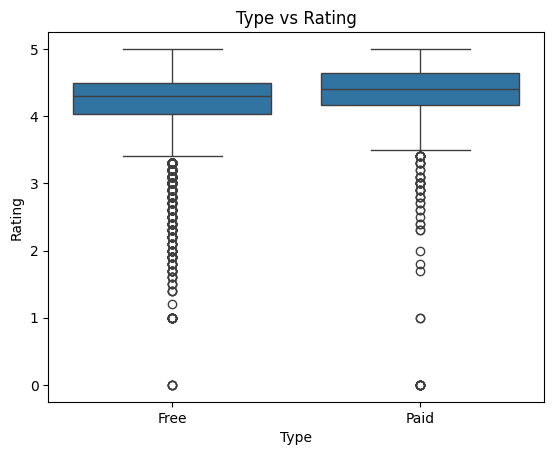

In [87]:
sns.boxplot(x='Type', y='Rating', data=df)
plt.xlabel('Type')
plt.ylabel('Rating')
plt.title('Type vs Rating')
plt.show()

We can see that paid apps have higher rating than free apps also both paid and free apps have rating more than 4.0

**Impact of Number of Installs on "Rating"**
- As Installs vary massively, so we use log_Scale for better visualization

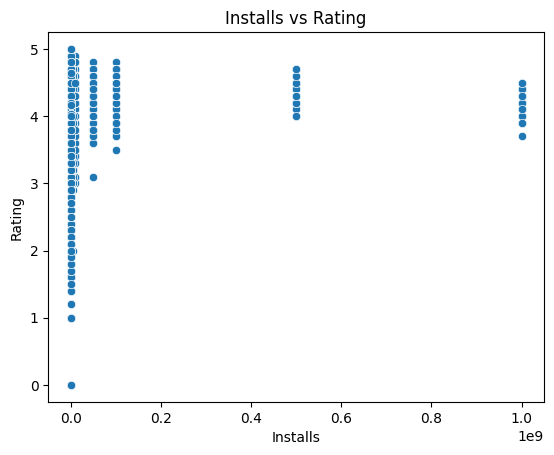

In [88]:
sns.scatterplot(x='Installs', y='Rating', data=df)
plt.xlabel('log')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Installs vs Rating')
plt.show()

Apps with higher Installs have higher rating

**Impact of app size over number of installs**

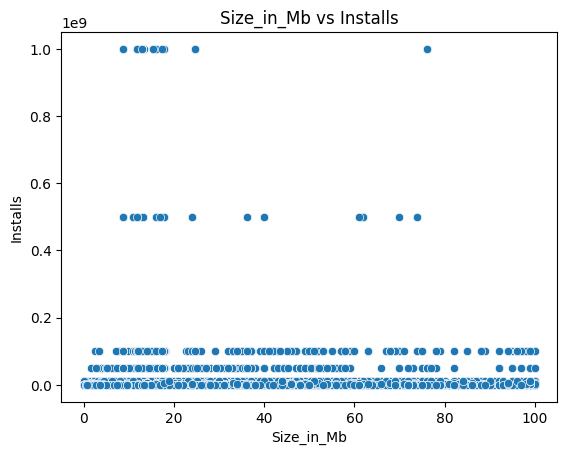

In [89]:
sns.scatterplot(x='Size_in_Mb', y='Installs', data=df)
plt.ylabel('log')
plt.xlabel('Size_in_Mb')
plt.ylabel('Installs')
plt.title('Size_in_Mb vs Installs')
plt.show()

No strong correlation between Size_in_Mb and Installs of apps exists

### Why choose "Rating" attribute for diagnostic analysis?

Rating is the most valuable performance indicator for an app. It's the direct voice of users and reflects:

- User satisfaction

- App quality

- User experience

- Influence on downloads and engagement

# Predictive Analysis

In [90]:
# Importing Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


***Drop the unnecessary columns***

In [91]:
New_df = df.copy()

New_df = New_df.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver' , 'Size_in_bytes'])

New_df

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Size_in_Mb,Installs Category
0,ART_AND_DESIGN,4.10000,159,10000,Free,0.0,Everyone,Art & Design,19.000000,moderate
1,ART_AND_DESIGN,3.90000,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,14.000000,high
2,ART_AND_DESIGN,4.70000,87510,5000000,Free,0.0,Everyone,Art & Design,8.700000,very high
3,ART_AND_DESIGN,4.50000,215644,50000000,Free,0.0,Teen,Art & Design,25.000000,Top Notch
4,ART_AND_DESIGN,4.30000,967,100000,Free,0.0,Everyone,Art & Design;Creativity,2.800000,more than moderate
...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.50000,38,5000,Free,0.0,Everyone,Education,53.000000,moderate
10837,FAMILY,5.00000,4,100,Free,0.0,Everyone,Education,3.600000,low
10838,MEDICAL,4.17097,3,1000,Free,0.0,Everyone,Medical,9.500000,low
10839,BOOKS_AND_REFERENCE,4.50000,114,1000,Free,0.0,Mature 17+,Books & Reference,13.374819,low


***Convert yhe categorical columns to numeric***

In [92]:
le = LabelEncoder()

categorical_columns = ['Category', 'Type', 'Content Rating', 'Genres','Installs Category']

for col in categorical_columns:
    New_df[col] = le.fit_transform(New_df[col])

New_df.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Size_in_Mb,Installs Category
0,0,4.1,159,10000,0,0.0,1,9,19.0,3
1,0,3.9,967,500000,0,0.0,1,12,14.0,1
2,0,4.7,87510,5000000,0,0.0,1,9,8.7,6
3,0,4.5,215644,50000000,0,0.0,4,9,25.0,0
4,0,4.3,967,100000,0,0.0,1,11,2.8,4


In [93]:
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from xgboost import XGBRegressor
import pickle

In [94]:
models = {
    'Linear Regression': {
      'model': LinearRegression(),
      'params': {},
      },
    'Support Vector Regression': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          
        },
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [1, 2, 3],
        },
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [1, 2, 3], 
        },
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [1, 2, 3], 
        },
    },
    'AdaBoost Regression': {
        'model': AdaBoostRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
        },
    },
    'KNN Regression': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5],
        },
    },
    'XGBoost Regression': {
        'model': XGBRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [1, 2, 3], 
        },
    },
}

***Splitting the data***

In [95]:
X = New_df.drop('Rating', axis=1)
y = New_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Scale the numeric features***

In [96]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
%%time
# Initialize a list to store model performance metrics
model_scores = []
# Initialize variables to keep track of the best regression model
# Start with the worst possible R2 score
best_r2_score = -float('inf')
best_regressor = None

# Iterate over the configured models
for name, model in models.items():
    # Set up a pipeline with data scaling and the current model
    pipeline = Pipeline([
        ('scaler', QuantileTransformer(random_state=42, output_distribution='normal')),
        ('model', model['model'])
    ])

    # Create a GridSearchCV object to tune model hyperparameters
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model['params'],
        cv=5,  # Number of cross-validation folds
        scoring='neg_mean_absolute_error',  # Scoring metric to optimize
        verbose=0,
        n_jobs=-1  # Use all available cores for parallel processing
    )

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train_scaled, y_train)
    # Predict on the test set using the best found model
    y_pred = grid_search.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    
    # Append performance metrics for the current model to the list
    model_scores.append({
        'Model': name,        
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2,
    })

    # Initialize variables to keep track of the best regression model
    # Check if this model has the best R2 score so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_regressor = grid_search.best_estimator_

# Sort the models based on the Model name (alphabetically)
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
# Convert the sorted model performance list to a DataFrame for display
metrics = pd.DataFrame(sorted_models)
# Identify the best performing model based on the R2 score
best_reg_model = max(sorted_models, key=lambda x: x['R2'])

# Use a custom function 'heading' to display the heading (not defined in this snippet)
#heading("Regression Models Performance")
# Display the metrics DataFrame with rounded values for readability
metrics.round(2)

CPU times: user 7.4 s, sys: 360 ms, total: 7.76 s
Wall time: 1min 9s


,Model,MAPE,MAE,R2
0,AdaBoost Regression,1.031725e+13,0.39,-0.09
1,Decision Tree Regression,9.000000e-02,0.31,0.14
2,Gradient Boosting Regression,2.353691e+12,0.29,0.22
3,KNN Regression,5.203429e+12,0.32,0.12
4,Linear Regression,1.617255e+13,0.34,0.02
5,Random Forest Regression,9.000000e-02,0.31,0.15
6,Support Vector Regression,1.421255e+13,0.29,0.14
7,XGBoost Regression,1.985754e+12,0.29,0.23


In [98]:
print(f"Model: {best_reg_model['Model']}")
print(f"MAPE: {best_reg_model['MAPE']:.2f}")
print(f"MAE: {best_reg_model['MAE']:.2f}")
print(f"R2 Score: {best_reg_model['R2']:.2f}")

Model: XGBoost Regression
MAPE: 1985753516525.65
MAE: 0.29
R2 Score: 0.23


The best performing model is XGBoost Regression.